# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import flatiron_stats as fistats

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
#Your code here
df = pd.read_csv('multipleChoiceResponses_cleaned.csv')

In [4]:
df.head(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important,NaN,NaN
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802310,64184.8
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017402,20882.4


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [14]:
df['FormalEducation'].unique()

array(["Bachelor's degree", "Master's degree", 'Doctoral degree', nan,
       "Some college/university study without earning a bachelor's degree",
       'I did not complete any formal education past high school',
       'Professional degree', 'I prefer not to answer'], dtype=object)

In [43]:
pd.options.display.float_format = '{:,.4f}'.format
df['AdjustedCompensation'].describe()

count            4,343.0000
mean         6,636,071.3469
std        429,399,613.3903
min                -73.5163
25%             20,369.4170
50%             53,812.1700
75%             95,666.0800
max     28,297,400,000.0000
Name: AdjustedCompensation, dtype: float64

<AxesSubplot:xlabel='AdjustedCompensation'>

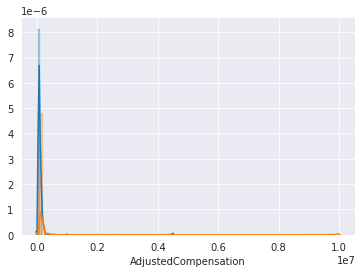

In [50]:
#Your code here

#Subset the appropriate data into 2 groups
ed = 'FormalEducation'
adjcomp = 'AdjustedCompensation'
edc1 = "Master's degree"
edc2 = "Bachelor's degree"
subset = df[(~df[ed].isnull()) & (~df[adjcomp].isnull())]
s1 = subset[subset[ed]==edc1][adjcomp]
s2 = subset[subset[ed]==edc2][adjcomp]

sns.distplot(s1)
sns.distplot(s2)


In [52]:
print('Comparison of {} for {} and {}'.format(adjcomp, edc1, edc2))
print("Median Values: \ts1: {} \ts2: {}".format(round(s1.median(),2), round(s2.median(),2)))
print("Mean Values: \ts1: {} \ts2: {}".format(round(s1.mean(),2), round(s2.mean(),2)))
print('Sample sizes: \ts1: {} \ts2: {}'.format(len(s1), len(s2)))
print("Welch's t-test p-value:", fistats.p_value_welch_ttest(s1, s2))

Comparison of AdjustedCompensation for Master's degree and Bachelor's degree
Median Values: 	s1: 53812.17 	s2: 38399.4
Mean Values: 	s1: 69139.9 	s2: 64887.1
Sample sizes: 	s1: 1990 	s2: 1107
Welch's t-test p-value: 0.33077639451272445


In [53]:
#Investigate Percentiles
for q in np.linspace(.8, 1, num=21):
    s1q =  round(s1.quantile(q=q), 2)
    s2q =  round(s2.quantile(q=q), 2)
    print('{}th percentile:\tset1: {}\tset2: {}'.format(round(q,2), s1q, s2q))

0.8th percentile:	set1: 103000.0	set2: 93233.13
0.81th percentile:	set1: 107009.0	set2: 95572.83
0.82th percentile:	set1: 110000.0	set2: 99276.38
0.83th percentile:	set1: 111503.83	set2: 100000.0
0.84th percentile:	set1: 115240.4	set2: 103040.0
0.85th percentile:	set1: 119582.6	set2: 105935.04
0.86th percentile:	set1: 120000.0	set2: 110000.0
0.87th percentile:	set1: 124719.88	set2: 112000.0
0.88th percentile:	set1: 129421.46	set2: 115000.0
0.89th percentile:	set1: 130000.0	set2: 120000.0
0.9th percentile:	set1: 135000.0	set2: 120346.5
0.91th percentile:	set1: 140000.0	set2: 126460.0
0.92th percentile:	set1: 149640.0	set2: 132615.4
0.93th percentile:	set1: 150000.0	set2: 140000.0
0.94th percentile:	set1: 160000.0	set2: 143408.8
0.95th percentile:	set1: 166778.6	set2: 150000.0
0.96th percentile:	set1: 180000.0	set2: 179849.74
0.97th percentile:	set1: 200000.0	set2: 195000.0
0.98th percentile:	set1: 211100.0	set2: 200000.0
0.99th percentile:	set1: 250000.0	set2: 250000.0
1.0th percentile:

In [54]:

print('Repeated Test with Outliers Removed:')
print('S1: {}\tS2: {}'.format(edc1, edc2))
outlier_threshold = 500000
s1 = subset[(subset[ed]==edc1) & (subset[adjcomp]<=outlier_threshold)][adjcomp]
s2 = subset[(subset[ed]==edc1) & (subset[adjcomp]<=outlier_threshold)][adjcomp]
print("Median Values: \ts1: {} \ts2: {}".format(round(s1.median(),2), round(s2.median(),2)))
print("Mean Values: \ts1: {} \ts2: {}".format(round(s1.mean(),2), round(s2.mean(),2)))
print('Sample sizes: \ts1: {} \ts2: {}'.format(len(s1), len(s2)))
print("Welch's t-test p-value with outliers removed:", fistats.p_value_welch_ttest(s1, s2))

Repeated Test with Outliers Removed:
S1: Master's degree	S2: Bachelor's degree
Median Values: 	s1: 53539.72 	s2: 53539.72
Mean Values: 	s1: 63976.63 	s2: 63976.63
Sample sizes: 	s1: 1985 	s2: 1985
Welch's t-test p-value with outliers removed: 0.5


<AxesSubplot:xlabel='AdjustedCompensation'>

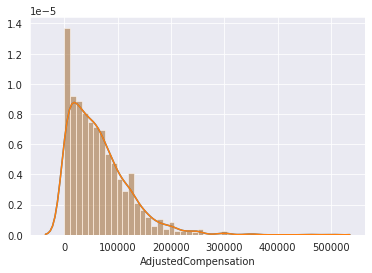

In [55]:
sns.distplot(s1)
sns.distplot(s2)

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

<AxesSubplot:xlabel='AdjustedCompensation'>

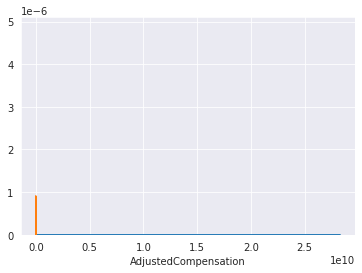

In [57]:
#Your code here

#Subset the appropriate data into 2 groups
ed = 'FormalEducation'
adjcomp = 'AdjustedCompensation'
edc1 = "Doctoral degree"
edc2 = "Bachelor's degree"
subset = df[(~df[ed].isnull()) & (~df[adjcomp].isnull())]
s2 = subset[subset[ed]==edc1][adjcomp]
s3 = subset[subset[ed]==edc2][adjcomp]

sns.distplot(s2)
sns.distplot(s3)


In [58]:
print('Comparison of {} for {} and {}'.format(adjcomp, edc1, edc2))
print("Median Values: \ts1: {} \ts2: {}".format(round(s1.median(),2), round(s2.median(),2)))
print("Mean Values: \ts1: {} \ts2: {}".format(round(s1.mean(),2), round(s2.mean(),2)))
print('Sample sizes: \ts1: {} \ts2: {}'.format(len(s1), len(s2)))
print("Welch's t-test p-value:", fistats.p_value_welch_ttest(s1, s2))

Comparison of AdjustedCompensation for Doctoral degree and Bachelor's degree
Median Values: 	s1: 53539.72 	s2: 74131.92
Mean Values: 	s1: 63976.63 	s2: 29566175.76
Sample sizes: 	s1: 1985 	s2: 967
Welch's t-test p-value: 0.15681634497362817


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [45]:
#Your code here  FormalEducation
pd.options.display.float_format = '{:,.6f}'.format
formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                                               sum_sq           df        F  \
C(FormalEducation)     654,029,360,270,939,520.000000     6.000000 0.590714   
Residual           799,941,376,712,828,911,616.000000 4,335.000000      nan   

                     PR(>F)  
C(FormalEducation) 0.738044  
Residual                nan  


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!